<a href="https://colab.research.google.com/github/Whiteheim/WH/blob/main/Dec06_example.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Python 파일 경로에 data 폴더를 만든 후 births.txt 파일 넣기

In [82]:
import numpy as np

# 세션이 종료되면 업로드했던 파일도 모두 사라짐
# 구글 드라이브에서 가져오는 방법도 있음

# data 폴더 안의 births.txt 파일 load하기

# 구분자 ',', 자료형은 정수로 표현
birth = np.loadtxt('data/births.txt', delimiter=',', dtype=np.int64)

print(birth.shape)
print(type(birth))

(132, 3)
<class 'numpy.ndarray'>


In [ ]:
birth

# 결과 : 연도, 남아 출생 수, 여아 출생 수

array([[   1880,   90993,  110491],
       [   1881,   91954,  100745],
       [   1882,  107850,  113688],
       [   1883,  112321,  104629],
       [   1884,  129022,  114445],
       [   1885,  133055,  107800],
       [   1886,  144535,  110784],
       [   1887,  145982,  101414],
       [   1888,  178627,  120853],
       [   1889,  178366,  110584],
       [   1890,  190377,  111025],
       [   1891,  185482,  101196],
       [   1892,  212346,  122037],
       [   1893,  212906,  112317],
       [   1894,  222922,  115772],
       [   1895,  233630,  117398],
       [   1896,  237920,  119570],
       [   1897,  234202,  112758],
       [   1898,  258770,  122693],
       [   1899,  233023,  106212],
       [   1900,  299828,  150499],
       [   1901,  239348,  106471],
       [   1902,  264077,  122659],
       [   1903,  261973,  119234],
       [   1904,  275371,  128125],
       [   1905,  291629,  132319],
       [   1906,  295303,  133159],
       [   1907,  318566,  1

In [ ]:
import matplotlib.pyplot as plt

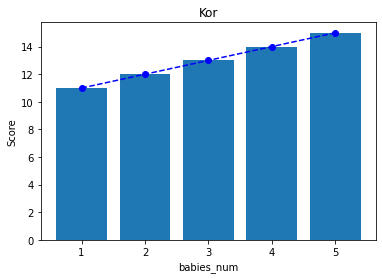

In [ ]:
a = np.array([1, 2, 3, 4, 5])
b = np.array([11, 12, 13, 14, 15])

plt.plot(a, b, 'bo--')
plt.bar(a, b)

plt.title('Kor')
plt.xlabel('babies_num')
plt.ylabel('Score')
plt.show()

In [ ]:
# 1. 남자아이, 여자아이 출생 수 평균 (정수) 구하기
for i in range(0, 132):
  boy = np.mean(birth[i][1], dtype=np.int64)
  girl = np.mean(birth[i][2], dtype=np.int64)
print(boy)  
print(girl)

1753500
1893230


In [74]:
print("남자아이 평균 : ", int(birth[:,1].mean()))
print("여자아이 평균 : ", int(birth[:,2].mean()))

남자아이 평균 :  1225776
여자아이 평균 :  1245399


In [ ]:
# 2. 2000년 ~ 2011년의 데이터
# 연도 남자 여자
# 2006, 1898463, 2052377 << 의 형태로 출력

birth.shape
for i in range(0, 132):
  if (2000 <= birth[i][0] <=2011):
    print(birth[i])

[   2000 1814601 1962406]
[   2001 1799049 1941251]
[   2002 1795206 1939815]
[   2003 1825359 1973434]
[   2004 1834145 1982794]
[   2005 1845379 1994841]
[   2006 1898463 2052377]
[   2007 1919408 2072139]
[   2008 1887234 2036289]
[   2009 1832925 1979303]
[   2010 1772738 1913851]
[   2011 1753500 1893230]


In [78]:
print("연도", "남자", "여자", sep="\t")
print("=" * 30)
for y, m, f in birth[birth[:, 0] >= 2000]:
  print(y, m, f, sep="\t")

연도	남자	여자
2000	1814601	1962406
2001	1799049	1941251
2002	1795206	1939815
2003	1825359	1973434
2004	1834145	1982794
2005	1845379	1994841
2006	1898463	2052377
2007	1919408	2072139
2008	1887234	2036289
2009	1832925	1979303
2010	1772738	1913851
2011	1753500	1893230


In [ ]:
# 3. 남자아이 출생이 가장 많은 연도 / 그 해의 남자아이 출생 수
np.argmax(birth, axis=0)
print(birth[77])

[   1957 2044160 2155866]


In [101]:
# argmax() : 가장 많은 값의 index를 반환 
birth[birth[:, 1].argmax()]
y = birth[birth[:, 1].argmax()][0] # 연도
b = birth[birth[:, 1].argmax()][1] # 남아 출생 수

print("연도", "남자아이 출생수", sep="\t")
print(y, b, sep="\t")

연도	남자아이 출생수
1957	2044160


In [95]:
# 4. 여자아이 출생이 가장 많은 top 5 / 연도 , 여자아이 수
# np.sort(birth, axis=0)[::-1]
np.argsort(birth, axis=0)[::-1]
print(birth[77][0], birth[77][2])
print(birth[79])
print(birth[80])
print(birth[81])
print(birth[78])

1957 2155866
[   1959 2023044 2133509]
[   1960 2022093 2132717]
[   1961 2017316 2122502]
[   1958 2010884 2120712]


In [99]:
top5_girls = np.sort(birth[:, 2])[-1: -6 : -1] # 역순으로 찾을때는 인덱스에 -1
                                          # 끝에서 부터 한칸씩 세기
top5_girls

print("연도", "여자아이 수", sep="\t")
print("=" * 20)
for i in birth:
  for j in top5_girls:
    if (i[2] == j):
      print(i[0], j, sep="\t")

연도	여자아이 수
1957	2155866
1958	2120712
1959	2133509
1960	2132717
1961	2122502


In [ ]:
# 5. 여자아이 출생률(%), 각 연도별 여자아이 출생수가 차지하는 비율을
#   데이터로 출력 (소수점 둘째자리까지)
# 연도 , 남자아이, 여자아이, 여자아이 출생률
# ===========================================
# 1980 , 1231451, 134551, 0.41 << 의 형식
for i in range(0, 132):
  a = (birth[i][2] / (birth[i][1] + birth[i][2]))
  a = np.round(a, decimals=2)
print(birth.dtype)


int64


In [105]:
girls_ratio = (birth[:, 2] / (birth[:, 1] + birth[:, 2])).round(2)
# girls_ratio
print("연도", "남아", "여아", "여아 출생률", sep="\t")
print("=" * 40)
for y, b, g, gr in zip(birth[:, 0], birth[:, 1], birth[:, 2], girls_ratio):
  print(y, b, g, gr, sep="\t")

연도	남아	여아	여아 출생률
1880	90993	110491	0.55
1881	91954	100745	0.52
1882	107850	113688	0.51
1883	112321	104629	0.48
1884	129022	114445	0.47
1885	133055	107800	0.45
1886	144535	110784	0.43
1887	145982	101414	0.41
1888	178627	120853	0.4
1889	178366	110584	0.38
1890	190377	111025	0.37
1891	185482	101196	0.35
1892	212346	122037	0.36
1893	212906	112317	0.35
1894	222922	115772	0.34
1895	233630	117398	0.33
1896	237920	119570	0.33
1897	234202	112758	0.32
1898	258770	122693	0.32
1899	233023	106212	0.31
1900	299828	150499	0.33
1901	239348	106471	0.31
1902	264077	122659	0.32
1903	261973	119234	0.31
1904	275371	128125	0.32
1905	291629	132319	0.31
1906	295303	133159	0.31
1907	318566	146833	0.32
1908	334313	154344	0.32
1909	347228	163999	0.32
1910	396501	194218	0.33
1911	418299	225968	0.35
1912	558103	429945	0.44
1913	624518	512557	0.45
1914	761548	654762	0.46
1915	983874	848603	0.46
1916	1044323	890099	0.46
1917	1081280	925511	0.46
1918	1157647	1013537	0.47
1919	1130145	980149	0.46
1920	1198283	1064463	0

In [ ]:
# 6. 2000년도 이후 데이터에 대한 출생량
# 남자아이의 수가 1800000이상이면 '많음' 아니면 '적음' 출력
for i in range(0, 132):
  if (birth[i][0] >= 2000) :
    print(np.where((birth[i][1] > 1800000),'많음', '적음'))

많음
적음
적음
많음
많음
많음
많음
많음
많음
많음
적음
적음


In [111]:
after_2000 = birth[birth[:, 0] >= 2000]
# print(after_2000)

boys = after_2000[:, 1]
# print(boys)

amount = np.where(boys >= 1800000, "많음", "적음")
# print(amount)
print("연도", "남아", "수", sep="\t")
for y, b, amt in zip(after_2000[:, 0], boys, amount):
  print(y, b, amt, sep="\t")

연도	남아	수
2000	1814601	많음
2001	1799049	적음
2002	1795206	적음
2003	1825359	많음
2004	1834145	많음
2005	1845379	많음
2006	1898463	많음
2007	1919408	많음
2008	1887234	많음
2009	1832925	많음
2010	1772738	적음
2011	1753500	적음


In [72]:
# 7. 1800년대, 1900년대, 2000년대의 각 남아, 여아 출생수의 평균
boy = []
for i in range(0, 132):
  if (birth[i][0] >= 2000):
    k = np.array(birth[i], dtype=np.int64)
    print(type(boy))
    boy.append(k)
    boy = np.array(boy, dtype=np.int64)
    

<class 'list'>
<class 'numpy.ndarray'>


AttributeError: ignored

In [123]:
print("1800대")
print("남아평균", "여아평균")
k_1800s = birth[ (birth[:, 0] >= 1800) & (birth[:, 0] < 1900) ][:, 1:]
print(k_1800s.mean(axis=0)[0], k_1800s.mean(axis=0)[1])

print()

print("1900대")
print("남아평균", "여아평균")
k_1900s = birth[ (birth[:, 0] >= 1900) & (birth[:, 0] < 2000) ][:, 1:]
print(k_1900s.mean(axis=0)[0], k_1900s.mean(axis=0)[1])

print()

print("2000대")
print("남아평균", "여아평균")
k_2000s = birth[ birth[:, 0] >= 2000 ][:, 1:]
print(k_2000s.mean(axis=0)[0].round(2), k_2000s.mean(axis=0)[1])

1800대
남아평균 여아평균
176714.15 111820.55

1900대
남아평균 여아평균
1362901.51 1384145.55

2000대
남아평균 여아평균
1831500.58 1978477.5


In [128]:
# 8. 여자아이 25% ~ 75% 의 값 구하기 (연도, 여자아이 출생수)
print("연도", "여아 출생 수", sep="\t")
g_q25 = np.quantile(birth[:, 2], 0.25)
g_q75 = np.quantile(birth[:, 2], 0.75)
print(birth[ (birth[:, 2] >= g_q25) & (birth[:, 2] <= g_q75) ][:, [0, 2]])

연도	여아 출생 수
[[   1913  512557]
 [   1914  654762]
 [   1915  848603]
 [   1916  890099]
 [   1917  925511]
 [   1918 1013537]
 [   1919  980149]
 [   1920 1064463]
 [   1921 1101457]
 [   1922 1088287]
 [   1923 1096168]
 [   1924 1132751]
 [   1925 1115958]
 [   1926 1110505]
 [   1927 1126717]
 [   1928 1107518]
 [   1929 1075313]
 [   1930 1097176]
 [   1931 1039127]
 [   1932 1043808]
 [   1933  991127]
 [   1934 1032291]
 [   1935 1040930]
 [   1936 1036974]
 [   1937 1066309]
 [   1938 1108841]
 [   1939 1106544]
 [   1940 1158900]
 [   1941 1227941]
 [   1942 1380774]
 [   1943 1426846]
 [   1944 1362555]
 [   1945 1345610]
 [   1946 1623650]
 [   1947 1829223]
 [   1948 1754469]
 [   1949 1773725]
 [   1950 1790673]
 [   1951 1881080]
 [   1965 1861378]
 [   1966 1783964]
 [   1967 1744527]
 [   1968 1738928]
 [   1969 1789732]
 [   1970 1859594]
 [   1971 1769201]
 [   1972 1622666]
 [   1973 1559338]
 [   1974 1573105]
 [   1975 1562207]
 [   1976 1569904]
 [   1977 1643684]
 

In [ ]:
# 9. 2000년대 남자아이 데이터 bar차트로 표현

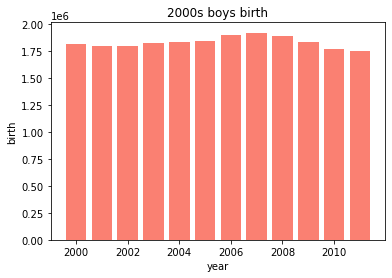

In [132]:
b_2000s = birth[birth[:, 0] >= 2000][:, 0:2]
# print(b_2000s)
import matplotlib.pyplot as plt
plt.bar(b_2000s[:, 0], b_2000s[:, 1], color="salmon")
plt.title("2000s boys birth")
plt.xlabel("year")
plt.ylabel("birth")
plt.show()